# Self Organizing map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

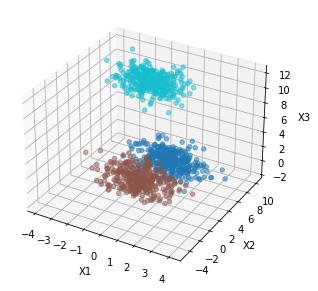

In [2]:
# Generate 3 class data from half spherical distribution
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0)

# 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='tab10', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

In [3]:
# SOM
from minisom import MiniSom
som = MiniSom(x=5, y=5, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

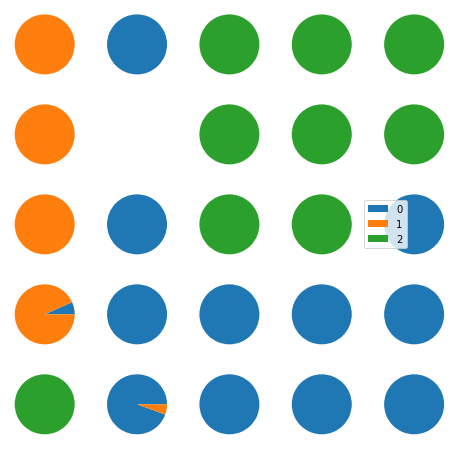

In [6]:
# Plot
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X, y)
label_names = np.unique(y)

fig, ax = plt.subplots(figsize=(8, 8))
grid = gridspec.GridSpec(5, 5, fig)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    ax = plt.subplot(grid[position[1], position[0]], aspect=1)
    patches, texts = ax.pie(label_fracs)

ax.legend(patches, label_names, bbox_to_anchor=(1, 0.5), ncol=1, loc='center left')
fig.patch.set_facecolor('white')
plt.show()

## Self Organizing map for MNIST Data

In [10]:
# Load MNIST hadwritten digits data
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# pick y=0,1,2
X_train = X_train[y_train < 3]
y_train = y_train[y_train < 3]

X_test = X_test[y_test < 3]
y_test = y_test[y_test < 3]

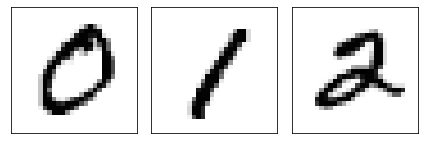

In [11]:
# Plot first 10 digits
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(3):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [12]:
# SOM
som = MiniSom(x=10, y=10, input_len=784, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_train)
som.train_random(data=X_train, num_iteration=100)

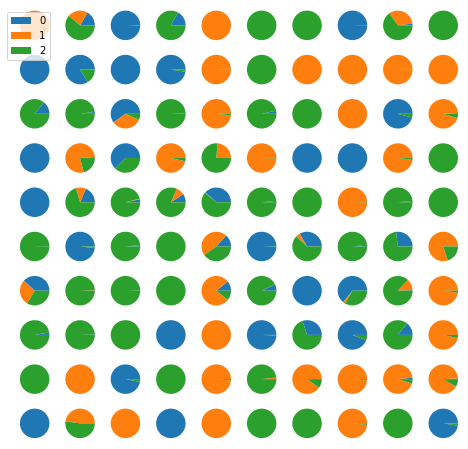

In [14]:
# Plot
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X_train, y_train)
label_names = np.unique(y_train)

fig, ax = plt.subplots(figsize=(8, 8))
grid = gridspec.GridSpec(10, 10, fig)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    ax = plt.subplot(grid[position[1], position[0]], aspect=1)
    patches, texts = ax.pie(label_fracs)

ax.legend(patches, label_names, bbox_to_anchor=(1.04, 1), ncol=1, loc='upper right')
plt.savefig('plots/SOM_MNIST.png', facecolor='white', bbox_inches='tight')

In [24]:
# Accuracy for test data
# Predict
y_pred = []
for i in range(len(X_test)):
    # winner
    w = som.winner(X_test[i])
    # label
    counter = labels_map[w]
    y_pred.append(max(counter, key=counter.get))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# 0.9733079122974261

[[ 948    2   30]
 [   0 1124   11]
 [  11   30  991]]


0.9733079122974261

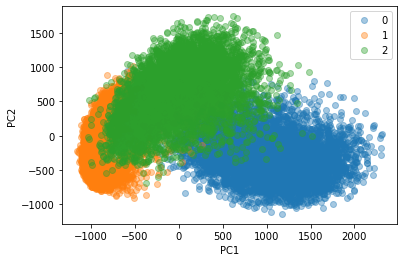

In [22]:
# comparison with Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

# Plot with label
X_pca = np.vstack((X_pca.T, y_train)).T
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'label'])
df.label = df.label.astype(int)
groups = df.groupby('label')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=6, label=name, alpha=0.4)
ax.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('plots/PCA_MNIST.png', facecolor='white', bbox_inches='tight')

In [25]:
# KNN with PCA
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca[:, :2], y_train)
y_pred = knn.predict(pca.transform(X_test))

# Accuracy
accuracy_score(y_test, y_pred)

# 0.9428026692087702

0.9428026692087702